# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mayavi import mlab

# Calculate

In [2]:
%%time
t = np.linspace(-0.01, 0.01, 1000)
x = np.linspace(-1/2, 1/2, 1000)

xx, tt = np.meshgrid(x, t, sparse=True)


log, cosh = np.log, np.cosh

a1 = 80
a2 = 40
s1 = 2
s2 = 2.3
ep = 1
b1 = a1*(1+a1**2)**(1/2)
b2 = a2*(1+a2**2)**(1/2)
q1 = a1*xx-b1*tt+s1+log(ep)
q2 = a2*xx-b2*tt+s2+log(ep)
A = ((a1-a2)**4+(a1-a2)**2-(b2-b1)**2)/(-(b1+b2)**2-(a1+a2)**2-(a1+a2)**4)
s = log(A*ep**2)

U = abs(a1**2-a2**2)*(a1**2*cosh(q2+s/2)+a2**2*cosh(q1+s/2)+abs(a1**2-a2**2)) \
    /(abs(a1-a2)*cosh((q1+q2+s)/2)+(a1+a2)*cosh((q2-q1)/2))**2

Wall time: 291 ms


# Plot

## Mayavi

### GUI

In [3]:
mlab.figure()

mlab.surf(xx, tt, U, warp_scale="auto")

mlab.colorbar(orientation='vertical')
mlab.outline()
mlab.axes()

mlab.show()

### Inline

In [4]:
mlab.init_notebook(backend='png')

Notebook initialized with png backend.



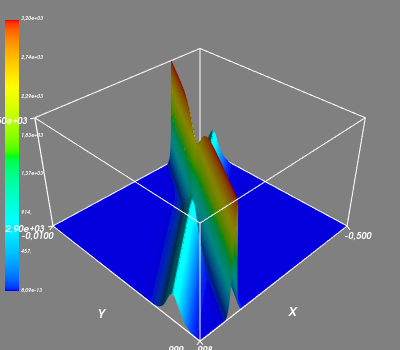

In [5]:
mlab.figure()

s = mlab.surf(xx, tt, U, warp_scale="auto")

mlab.colorbar(orientation='vertical')
mlab.outline()
mlab.axes()

s

## Matplotlib

### GUI

In [3]:
%matplotlib qt

In [4]:
plt.figure()

plt.pcolormesh(xx, tt, U, cmap="viridis", shading="nearest")

plt.colorbar();

In [5]:
fig = plt.figure()
ax = plt.subplot(projection="3d")


# rstride и cstride по-умолчанию равны 10
# при rstride=1 и cstride=1 совсем виснет
surf = ax.plot_surface(xx, tt, U, cmap="viridis",
                       rstride=5, cstride=5)

fig.colorbar(surf);

### Inline

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

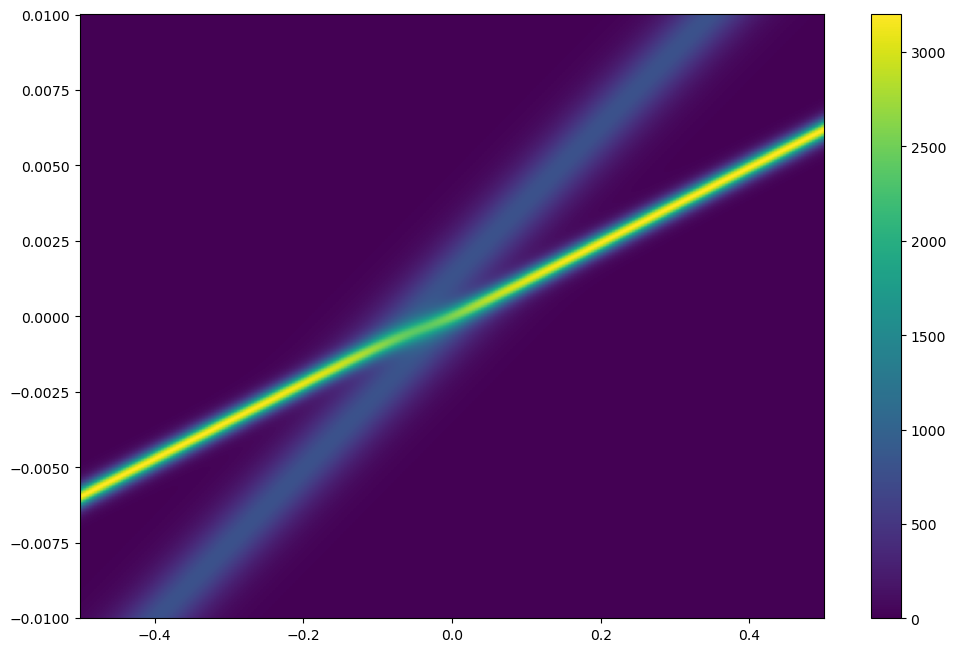

In [10]:
plt.figure()

plt.pcolormesh(xx, tt, U, cmap="viridis", shading="nearest")

plt.colorbar();

In [6]:
fig = plt.figure()
ax = plt.subplot(projection="3d")


# rstride и cstride по-умолчанию равны 10
# при rstride=1 и cstride=1 совсем виснет
surf = ax.plot_surface(xx, tt, U, cmap="viridis",
                       rstride=5, cstride=5)

fig.colorbar(surf);

# test


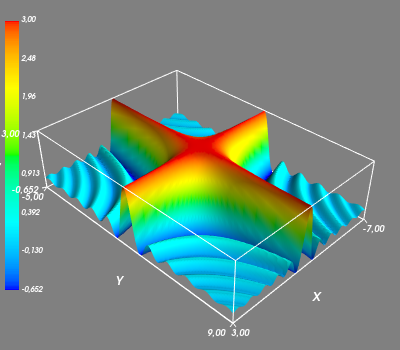

In [12]:
x = np.arange(-7., 7.05, 0.1)
y = np.arange(-5., 5.05, 0.1)

xx, yy = np.meshgrid(x, y, sparse=True)

z = 3.0 * np.sin(xx * yy + 1e-4)/(xx * yy + 1e-4)


mlab.figure()

s = mlab.surf(x, y, z)

mlab.colorbar(orientation='vertical')
mlab.outline()
mlab.axes()

s